# Numpy -  multidimensional data arrays

This notebook is a copy of J.R. Johansson's excellent [Numpy notebook](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb) with some additional examples from [Jessica B. Hamrick's Numpy notebook](https://github.com/jhamrick/nbgrader-demo/blob/master/instructor/source/ps1/3%20-%20Introduction%20to%20NumPy.ipynb)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Introduction

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy` you need to import the module, using for example:

In [2]:
import numpy as np

In the `numpy` package the terminology used for vectors, matrices and higher-dimensional data sets is *array*. 

NumPy is incredibly powerful and has many features, but this can be a bit intimidating when you're first starting to use it. If you are familiar with other scientific computing languages, the following guides may be of use:

- NumPy for Matlab Users: http://mathesaurus.sourceforge.net/matlab-numpy.html
- NumPy for R (and S-Plus) Users: http://mathesaurus.sourceforge.net/r-numpy.html

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files


| Numpy function | What it does ?                                                                                                        |
|----------------|-----------------------------------------------------------------------------------------------------------------------|
| np.array       | Convert array like python object to NumPy array                                                                       |
| np.arange      | Create arrays with regularly incrementing values.                                                                     |
| np.ones        | Create an array filled with 1 values                                                                                  |
| np.zeros       | Create an array filled with 0 values                                                                                  |
| np.full        | Create an array filled with the specified value                                                                       |
| np.random.rand | Generate arrays of random values in the specified shape                                                               |
| np.linspace    | Create arrays with a specified number of elements, and spaced equally between the specified beginning and end values. |

One thing that you can do with lists that you cannot do with NumPy arrays is adding and removing elements. For example, I can create a list and then add elements to it with append:

In [3]:
mylist = []
mylist.append(7)
mylist.append(2)
mylist

[7, 2]

However, you cannot do this with NumPy arrays. If you tried to run the following code, for example:

    myarray = np.array([])
    myarray.append(7)
You'd get an error like this:

    ---------------------------------------------------------------------------
    AttributeError                            Traceback (most recent call last)
    <ipython-input-25-0017a7f2667c> in <module>()
          1 myarray = np.array([])
    ----> 2 myarray.append(7)

    AttributeError: 'numpy.ndarray' object has no attribute 'append'

<div class="alert alert-info">To create a NumPy array, you must create an array with the correct shape from the beginning. However, the array doesn't have to have all the correct values from the very beginning: these you can fill in later.</div>

### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [4]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [5]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [7]:
v.shape

(4,)

In [8]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [9]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`

In [10]:
np.shape(M)

(2, 2)

In [11]:
np.size(M)

4

Some of the important attributes of a NumPy object are:

- **ndim**: displays the dimension of the array
- **shape**: returns a tuple of integers indicating the size of the array
- **size**: returns the total number of elements in the NumPy array
- **dtype**: returns the type of elements in the array, i.e., int64, character
- **itemsize**: returns the size in bytes of each item
- **reshape**: Reshapes the NumPy array

In [12]:
print(M)
print("ndim: %s" % M.ndim)
print("shape: (%s,%s)" % M.shape)
print("size: %s" % M.size)
print("dtype: %s" % M.dtype)
print("itemsize: %s" % M.itemsize)

[[1 2]
 [3 4]]
ndim: 2
shape: (2,2)
size: 4
dtype: int64
itemsize: 8


So far the `numpy.ndarray` looks awefully much like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementing such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when the array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [13]:
M.dtype

dtype('int64')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [14]:
M[0,0] = "hello"

ValueError: invalid literal for int() with base 10: 'hello'

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [16]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Common data types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, `object`, etc.

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generate arrays of different forms. Some of the more common are:

#### arange

In [17]:
# create a range

x = np.arange(0, 10, 1) # arguments: start, stop, step

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace

In [19]:
# using linspace, both end points ARE included
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [20]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [21]:
x, y = np.mgrid[0:5, 0:5] # similar to meshgrid in MATLAB

In [22]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [23]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### random data

In [24]:
from numpy import random

In [25]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[0.46526486, 0.33545356, 0.60485063, 0.10888525, 0.21841283],
       [0.33011199, 0.77173134, 0.07957271, 0.51510697, 0.8117858 ],
       [0.1332732 , 0.43125213, 0.61207266, 0.3399414 , 0.66002201],
       [0.17587285, 0.40338213, 0.69172738, 0.28493616, 0.41446249],
       [0.69950479, 0.69028249, 0.22255598, 0.92074117, 0.15612409]])

In [26]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[-0.49666774, -1.56162203,  0.00368648,  0.50829911,  0.95300545],
       [-1.60435585, -0.24507547,  1.9259452 ,  0.73512728,  0.1072572 ],
       [-0.02770074, -0.25417772, -1.66703327, -0.56003105,  0.70634163],
       [-2.60957982, -0.07397441,  0.8594729 , -1.05122938,  1.53023372],
       [ 1.3725573 , -1.18358119,  0.10393433,  0.65242178,  0.862934  ]])

#### diag

In [27]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [28]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [29]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Array computations

So far, NumPy arrays seem basically the same as regular lists. What's the big deal about them?

### Working with single arrays

One advantage of using NumPy arrays over lists is the ability to do a computation over the entire array. For example, if you were using lists and wanted to add one to every element of the list, here's how you would do it:

In [31]:
mylist = [3, 6, 1, 0, 10, 22]
mylist_plus1 = []
for x in mylist:
    mylist_plus1.append(x + 1)
mylist_plus1

[4, 7, 2, 1, 11, 23]

Or, you could use a list comprehension:

In [32]:
mylist = [3, 6, 1, 0, 10, 22]
mylist_plus1 = [x + 1 for x in mylist]
mylist_plus1

[4, 7, 2, 1, 11, 23]

In contrast, adding one to every element of a NumPy array is far simpler:

In [33]:
myarray = np.array([3, 6, 1, 0, 10, 22])
myarray_plus1 = myarray + 1
myarray_plus1

array([ 4,  7,  2,  1, 11, 23])


This won't work with normal lists. For example, if you ran mylist + 1, you'd get an error like this:

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-19-5b3951a16990> in <module>()
    ----> 1 mylist + 1

    TypeError: can only concatenate list (not "int") to list
We can do the same thing for subtraction, multiplication, etc.:

In [34]:
print("Subtraction: \t" + str(myarray - 2))
print("Multiplication:\t" + str(myarray * 10))
print("Squared: \t" + str(myarray ** 2))
print("Square root: \t" + str(np.sqrt(myarray)))
print("Exponential: \t" + str(np.exp(myarray)))

Subtraction: 	[ 1  4 -1 -2  8 20]
Multiplication:	[ 30  60  10   0 100 220]
Squared: 	[  9  36   1   0 100 484]
Square root: 	[1.73205081 2.44948974 1.         0.         3.16227766 4.69041576]
Exponential: 	[2.00855369e+01 4.03428793e+02 2.71828183e+00 1.00000000e+00
 2.20264658e+04 3.58491285e+09]


Working with multiple arrays
We can also easily do these operations for multiple arrays. For example, let's say we want to add the corresponding elements of two lists together. Here's how we'd do it with regular lists:

In [35]:
list_a = [1, 2, 3, 4, 5]
list_b = [6, 7, 8, 9, 10]
list_c = [list_a[i] + list_b[i] for i in range(len(list_a))]
list_c

[7, 9, 11, 13, 15]

With NumPy arrays, we just have to add the arrays together:

In [36]:
array_a = np.array(list_a) # equivalent to np.array([1, 2, 3, 4, 5])
array_b = np.array(list_b) # equivalent to np.array([6, 7, 8, 9, 10])
array_c = array_a + array_b
array_c

array([ 7,  9, 11, 13, 15])

<div class="alert alert-warning">Note: make sure when adding arrays that you are actually working with arrays, because if you try to add two lists, you will *not* get an error. Instead, the lists will be concatenated:</div>

In [37]:
list_a + list_b

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Just as when we are working with a single array, we can add, subtract, divide, multiply, etc. several arrays together:

In [38]:
print("Subtraction: \t" + str(array_a - array_b))
print("Multiplication:\t" + str(array_a * array_b))
print("Exponent: \t" + str(array_a ** array_b))
print("Division: \t" + str(array_a / array_b))

Subtraction: 	[-5 -5 -5 -5 -5]
Multiplication:	[ 6 14 24 36 50]
Exponent: 	[      1     128    6561  262144 9765625]
Division: 	[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


## File I/O

### Comma-separated values (CSV)

A very common file format for data files is comma-separated values (CSV), or related formats such as TSV (tab-separated values). To read data from such files into Numpy arrays we can use the `numpy.genfromtxt` function. For example, 

In [39]:
!head data/stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [40]:
data = np.genfromtxt('data/stockholm_td_adj.dat')

In [41]:
data.shape

(77431, 7)

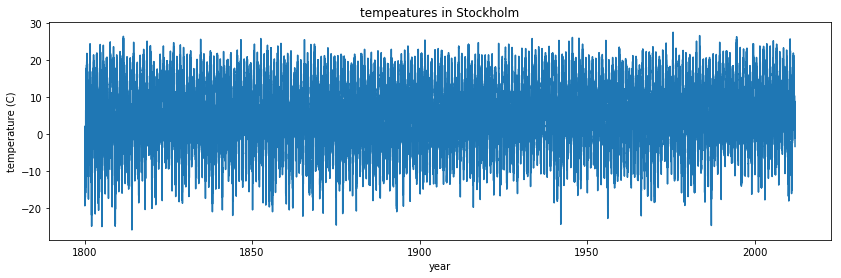

In [42]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [43]:
M = np.random.rand(3,3)

M

array([[0.66213699, 0.05990807, 0.39356681],
       [0.82267055, 0.03823638, 0.85601121],
       [0.01918591, 0.34494948, 0.16553998]])

In [44]:
np.savetxt("data/random-matrix.csv", M)

In [45]:
!cat data/random-matrix.csv

6.621369884627421598e-01 5.990807076803938980e-02 3.935668104354413943e-01
8.226705526524893397e-01 3.823637902456511473e-02 8.560112148156683309e-01
1.918590917359441761e-02 3.449494836897697425e-01 1.655399750304711315e-01


In [46]:
np.savetxt("data/random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat data/random-matrix.csv

0.66214 0.05991 0.39357
0.82267 0.03824 0.85601
0.01919 0.34495 0.16554


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [47]:
np.save("data/random-matrix.npy", M)

!file data/random-matrix.npy

data/random-matrix.npy: NumPy array, version 1.0, header length 118


In [48]:
np.load("data/random-matrix.npy")

array([[0.66213699, 0.05990807, 0.39356681],
       [0.82267055, 0.03823638, 0.85601121],
       [0.01918591, 0.34494948, 0.16553998]])

## More properties of the numpy arrays

In [49]:
M.itemsize # bytes per element

8

In [50]:
M.nbytes # number of bytes

72

In [51]:
M.ndim # number of dimensions

2

## Manipulating arrays

### Indexing

We can index elements in an array using square brackets and indices:

In [52]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [53]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

0.038236379024565115

If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array) 

In [54]:
M

array([[0.66213699, 0.05990807, 0.39356681],
       [0.82267055, 0.03823638, 0.85601121],
       [0.01918591, 0.34494948, 0.16553998]])

In [55]:
M[1]

array([0.82267055, 0.03823638, 0.85601121])

The same thing can be achieved with using `:` instead of an index: 

In [56]:
M[1,:] # row 1

array([0.82267055, 0.03823638, 0.85601121])

In [57]:
M[:,1] # column 1

array([0.05990807, 0.03823638, 0.34494948])

We can assign new values to elements in an array using indexing:

In [58]:
M[0,0] = 1

In [59]:
M

array([[1.        , 0.05990807, 0.39356681],
       [0.82267055, 0.03823638, 0.85601121],
       [0.01918591, 0.34494948, 0.16553998]])

In [60]:
# also works for rows and columns
M[1,:] = 0
M[:,2] = -1

In [61]:
M

array([[ 1.        ,  0.05990807, -1.        ],
       [ 0.        ,  0.        , -1.        ],
       [ 0.01918591,  0.34494948, -1.        ]])

### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

Slicing rules:

- arr[2:5] will print items 2 to 4. Index in NumPy arrays starts from 0
- arr[2::2] will print items 2 to end skipping 2 items
- arr[::-1] will print the array in the reverse order
- arr[1:] will print from row 1 to end

Accessing a multi-dimensional NumPy array can be done using following form:

```Array[row_start_index:row_end_index, column_start_index: column_end_index]```

<div class="alert alert-warning">Note that the exclusive slice indexing described above is different than some other languages you may be familiar with, like Matlab and R. myarray[1:2] returns only the second elment in myarray in Python, instead of the first and second element.</div>

In [62]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [63]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [64]:
A[1:3] = [-2,-3]

A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [65]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [66]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [67]:
A[:3] # first three elements

array([ 1, -2, -3])

In [68]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [69]:
A = np.array([1,2,3,4,5])

In [70]:
A[-1] # the last element in the array

5

In [71]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:

In [72]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [73]:
# a block from the original array
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [74]:
# strides
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Fancy indexing

Sometimes, there are more advanced operations we want to do with NumPy arrays. For example, if we had an array of values and wanted to set all negative values to zero, how would we do this? The answer is called fancy indexing, and be done two ways: boolean indexing, and array indexing.

#### Boolean indexing

The idea behind boolean indexing is that for each element of the array, we know whether we want to select it or not. A boolean array is an array of the same shape as our original array which contains only True and False values. The location of the True values in our boolean array indicate the location of the element in our original array that we want to select, while the location of the False values correspond to those elements in our original array that we don't want to select.

Let's consider some experiment data:

In [75]:
data = np.load("data/experiment_data.npy")
data

array([[1668.07869346,  774.38921876, 3161.14983152, ..., 2359.05394666,
         784.36404676,  448.33416341],
       [2419.38185232,  809.18389145, 2766.62648929, ..., 1159.47379735,
        1330.44887992, 1842.3268586 ],
       [2221.02887591, 1496.00517071,  354.95889145, ..., 1355.74575912,
        1205.29137942, 1385.71283365],
       ...,
       [1654.50469248,  518.3271927 , 5127.58599224, ..., 2544.1042064 ,
         624.07607332, 1029.57386246],
       [ 480.68016502, 4690.12200498, 1520.27397139, ..., 1000.40541618,
         988.73647145,  378.43452948],
       [1823.42891807, 3680.12951133, 3522.94413167, ...,  591.4133153 ,
         383.26367525, 1768.50528483]])

Recall that these are reaction times. It is typically accepted that really low reaction times -- such as less than 100 milliseconds -- are too fast for people to have actually seen and processed the stimulus. Let's see if there are any reaction times less than 100 milliseconds in our data.

To pull out just the elements less than 100 milliseconds, we need two steps. First, we use boolean comparisons to check which are less than 100ms:

In [76]:
too_fast = data < 100
too_fast

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Then, using this `too_fast` array, we can index *back into* the original array, and see that there are indeed some trials which were abnormally fast:

In [77]:
data[too_fast]

array([86.28125135, 76.63231393, 68.72526177, 77.25801031, 97.065495  ,
       92.13792056, 90.05066503, 86.59892207, 96.45674184, 90.79293103,
       81.97898954, 47.59226041, 98.80537434])

What this is doing is essentially saying: for every element in `too_fast` that is `True`, give me the corresponding element in `arr`. 

Bcause this is a boolean array, we can also negate it, and pull out all the elements that we consider to be valid reaction times:

In [78]:
data[~too_fast]

array([1668.07869346,  774.38921876, 3161.14983152, ...,  591.4133153 ,
        383.26367525, 1768.50528483])

Not only does this *give* you the elements, but modifying those elements will modify the original array, too. In this case, we will set our "too fast" elements to have a value of "not a number", or `NaN`:

In [79]:
data[too_fast] = np.nan
data

array([[1668.07869346,  774.38921876, 3161.14983152, ..., 2359.05394666,
         784.36404676,  448.33416341],
       [2419.38185232,  809.18389145, 2766.62648929, ..., 1159.47379735,
        1330.44887992, 1842.3268586 ],
       [2221.02887591, 1496.00517071,  354.95889145, ..., 1355.74575912,
        1205.29137942, 1385.71283365],
       ...,
       [1654.50469248,  518.3271927 , 5127.58599224, ..., 2544.1042064 ,
         624.07607332, 1029.57386246],
       [ 480.68016502, 4690.12200498, 1520.27397139, ..., 1000.40541618,
         988.73647145,  378.43452948],
       [1823.42891807, 3680.12951133, 3522.94413167, ...,  591.4133153 ,
         383.26367525, 1768.50528483]])

Now, if we try to find which elements are less than 100 milliseconds, we will not find any:

In [80]:
data[data < 100]

array([], dtype=float64)

#### Exercise: Threshold

<div class="alert alert-success">
Write a function, <code>threshold</code>, which takes an array and returns a new array with values thresholded by the mean of the array.
</div>

In [81]:
def threshold(arr):
    """Computes the mean of the given array, and returns a new array which
    is 1 where values in the original array are greater than the mean, 0 where
    they are equal to the mean, and -1 where they are less than the mean.

    Remember that if you want to create a copy of an array, you need to use
    `arr.copy()`.
    
    Hint: your solution should use boolean indexing, and can be done in six
    lines of code (including the return statement).
    
    Parameters
    ----------
    arr : numpy.ndarray

    Returns
    -------
    new_arr : thresholded version of `arr`
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
"""Try a few obvious threshold cases."""
from numpy.testing import assert_array_equal
assert_array_equal(threshold(np.array([1, 1, 1, 1])), np.array([0, 0, 0, 0]))
assert_array_equal(threshold(np.array([1, 0, 1, 0])), np.array([1, -1, 1, -1]))
assert_array_equal(threshold(np.array([1, 0.5, 0, 0.5])), np.array([1, 0, -1, 0]))
assert_array_equal(
    threshold(np.array([[0.5, 0.2, -0.3, 0.1], [1.7, -3.8, 0.5, 0.6]])), 
    np.array([[1, 1, -1, 1], [1, -1, 1, 1]]))
print("Success!")

In [ ]:
"""Make sure a copy of the array is being returned, and that the original array is unmodified."""
x = np.array([[0.5, 0.2, -0.3, 0.1], [1.7, -3.8, 0.5, 0.6]])
y = threshold(x)
assert_array_equal(x, np.array([[0.5, 0.2, -0.3, 0.1], [1.7, -3.8, 0.5, 0.6]]))
assert_array_equal(y, np.array([[1, 1, -1, 1], [1, -1, 1, 1]]))
print("Success!")

#### Array Indexing

The other type of fancy indexing is array indexing. Let's consider our average response across participants:


In [83]:
data = np.load("data/experiment_data.npy")
avg_responses = np.mean(data, axis=1)
avg_responses

array([1698.68801725, 1888.71240023, 1796.53362098, 1879.6038851 ,
       1882.53249686, 1824.79568606, 1746.75780815, 1748.55448988,
       1655.75347639, 1740.67757826, 1854.98538242, 1720.70259522,
       1675.2006642 , 1746.52724187, 1768.64738486, 1794.45589925,
       1860.06861469, 1835.73006077, 1520.77977686, 1795.55654863,
       1794.26437533, 1716.73345285, 1740.64166499, 1704.87601852,
       1906.06514665, 1722.68258855, 1857.70131135, 1878.26245376,
       1741.26393398, 1680.21711839, 1830.55940979, 1697.03486501,
       1892.45119973, 1888.69786047, 1653.73721041, 1794.17096019,
       1779.9941148 , 1832.42610672, 1861.63504795, 1685.20108106,
       1652.29647646, 1718.43799102, 1633.30628308, 1686.72435462,
       1810.54490061, 1703.7949561 , 1747.64361845, 1670.90982655,
       1830.47925898, 1771.15425183])

And let's say we also know which element corresponds to which participant, through the following `participants` array:

In [84]:
participants = np.load("data/experiment_participants.npy")
participants

array(['p_045', 'p_039', 'p_027', 'p_023', 'p_041', 'p_008', 'p_025',
       'p_019', 'p_036', 'p_049', 'p_050', 'p_029', 'p_032', 'p_006',
       'p_028', 'p_034', 'p_044', 'p_016', 'p_010', 'p_017', 'p_022',
       'p_033', 'p_042', 'p_009', 'p_047', 'p_035', 'p_002', 'p_014',
       'p_020', 'p_043', 'p_003', 'p_012', 'p_030', 'p_015', 'p_011',
       'p_018', 'p_004', 'p_040', 'p_001', 'p_031', 'p_005', 'p_013',
       'p_046', 'p_038', 'p_021', 'p_026', 'p_024', 'p_048', 'p_007',
       'p_037'], dtype='<U5')

In other words, the first element of `avg_responses` corresponds to the first element of `participants` (so participant 45), the second element of `avg_responses` was given by participant 39, and so on.

Let's say we wanted to know what participants had the largest average response, and what participants had the smallest average response. To do this, we might try sorting the responses:

In [85]:
np.sort(avg_responses)

array([1520.77977686, 1633.30628308, 1652.29647646, 1653.73721041,
       1655.75347639, 1670.90982655, 1675.2006642 , 1680.21711839,
       1685.20108106, 1686.72435462, 1697.03486501, 1698.68801725,
       1703.7949561 , 1704.87601852, 1716.73345285, 1718.43799102,
       1720.70259522, 1722.68258855, 1740.64166499, 1740.67757826,
       1741.26393398, 1746.52724187, 1746.75780815, 1747.64361845,
       1748.55448988, 1768.64738486, 1771.15425183, 1779.9941148 ,
       1794.17096019, 1794.26437533, 1794.45589925, 1795.55654863,
       1796.53362098, 1810.54490061, 1824.79568606, 1830.47925898,
       1830.55940979, 1832.42610672, 1835.73006077, 1854.98538242,
       1857.70131135, 1860.06861469, 1861.63504795, 1878.26245376,
       1879.6038851 , 1882.53249686, 1888.69786047, 1888.71240023,
       1892.45119973, 1906.06514665])

However, we then don't know which responses correspond to which trials. A different way to do this would be to use `np.argsort`, which returns an array of indices corresponding to the sorted order of the elements, rather than the elements in sorted order:

In [86]:
np.argsort(avg_responses)

array([18, 42, 40, 34,  8, 47, 12, 29, 39, 43, 31,  0, 45, 23, 21, 41, 11,
       25, 22,  9, 28, 13,  6, 46,  7, 14, 49, 36, 35, 20, 15, 19,  2, 44,
        5, 48, 30, 37, 17, 10, 26, 16, 38, 27,  3,  4, 33,  1, 32, 24])

What this says is that element 18 is the smallest response, element 42 is the next smallest response, and so on, all the way to element 24, which is the largest response:

In [87]:
avg_responses[18]

1520.7797768567086

In [88]:
avg_responses[42]

1633.3062830758922

In [89]:
avg_responses[24]

1906.0651466520821

To use fancy indexing, we can actually use this array of integers as an index. If we use it on the original array, then we will obtain the sorted elements:

In [90]:
avg_responses[np.argsort(avg_responses)]

array([1520.77977686, 1633.30628308, 1652.29647646, 1653.73721041,
       1655.75347639, 1670.90982655, 1675.2006642 , 1680.21711839,
       1685.20108106, 1686.72435462, 1697.03486501, 1698.68801725,
       1703.7949561 , 1704.87601852, 1716.73345285, 1718.43799102,
       1720.70259522, 1722.68258855, 1740.64166499, 1740.67757826,
       1741.26393398, 1746.52724187, 1746.75780815, 1747.64361845,
       1748.55448988, 1768.64738486, 1771.15425183, 1779.9941148 ,
       1794.17096019, 1794.26437533, 1794.45589925, 1795.55654863,
       1796.53362098, 1810.54490061, 1824.79568606, 1830.47925898,
       1830.55940979, 1832.42610672, 1835.73006077, 1854.98538242,
       1857.70131135, 1860.06861469, 1861.63504795, 1878.26245376,
       1879.6038851 , 1882.53249686, 1888.69786047, 1888.71240023,
       1892.45119973, 1906.06514665])

And if we use it on our array of participants, then we can determine what participants had the largest and smallest responses:

In [91]:
participants[np.argsort(avg_responses)]

array(['p_010', 'p_046', 'p_005', 'p_011', 'p_036', 'p_048', 'p_032',
       'p_043', 'p_031', 'p_038', 'p_012', 'p_045', 'p_026', 'p_009',
       'p_033', 'p_013', 'p_029', 'p_035', 'p_042', 'p_049', 'p_020',
       'p_006', 'p_025', 'p_024', 'p_019', 'p_028', 'p_037', 'p_004',
       'p_018', 'p_022', 'p_034', 'p_017', 'p_027', 'p_021', 'p_008',
       'p_007', 'p_003', 'p_040', 'p_016', 'p_050', 'p_002', 'p_044',
       'p_001', 'p_014', 'p_023', 'p_041', 'p_015', 'p_039', 'p_030',
       'p_047'], dtype='<U5')

So, in this case, participant 10 had the smallest average response, while participant 47 had the largest average response.

#### From boolean to integer indices
Sometimes, we want to use a combination of boolean and array indexing. For example, if we wanted to pull out just the responses for participant 2, a natural approach would be to use boolean indexing:

In [92]:
participant_2_responses = data[participants == 'p_002']
participant_2_responses

array([[ 1519.95398267,  2268.97864618,  1195.65942267,   504.90066814,
         1801.02089755,   925.24286169,  1810.30761149,  1325.80705157,
         1175.54586424, 10408.41065951,  2455.08935241,   357.09813683,
         1772.0844697 ,  1196.14813706,  8314.75793716,  2675.68801506,
          730.08949799,   425.0148563 ,  2402.60428235,  1428.93884317,
          227.37915983,  1302.38963652,  1593.64880997,  1806.89076956,
         2533.22196284,  1207.73423053,  6303.25912496,  8886.54201129,
          994.92553099,  1713.41231842,   401.87479894,  2505.85572837,
         1952.73193948,   207.56620328,   603.30726209,  3616.1399997 ,
          830.73548608,  1068.04701882,  1469.02747094,  6370.22310164,
          604.55979416,  9081.14741057,  1965.26863145,  3518.87071627,
          517.41562916,  8229.56635964,   461.33763334,   780.20882914,
         1650.10585622,  1314.87174398,  1224.22622967,  2083.55702061,
         2968.86713293,  1869.42631685,  1111.82126554,  1948.83

Another way that we could do this would be to determine the *index* of participant 2, and then use that to index into `data`. To do this, we can use a function called `np.argwhere`, which returns the indices of elements that are true:

In [93]:
np.argwhere(participants == 'p_002')

array([[26]])

So in this case, we see that participant 2 corresponds to index 26.

#### Exercise: Averaging responses

<div class="alert alert-success">
Write a function that takes as arguments a participant id, the data, and the list of participant names, and computes the average response for the given participant.
</div>

In [94]:
def participant_mean(participant, data, participants):
    """Computes the mean response for the given participant. A ValueError
    should be raised if more than one participant has the given name.
    
    Hint: your solution should use `np.argwhere`, and can be done in
    four lines (including the return statement).
    
    Parameters
    ----------
    participant: string
        The name/id of the participant
    data: numpy.ndarray with shape (n, m)
        Rows correspond to participants, columns to trials
    participants: numpy.ndarray with shape(n,)
        A string array containing participant names/ids, corresponding to
        the rows of the `data` array.
        
    Returns
    -------
    float: the mean response of the participant over all trials
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
"""Check for correct answers with the example experiment data."""
from numpy.testing import assert_allclose
data = np.load("data/experiment_data.npy")
participants = np.load("data/experiment_participants.npy")
assert_allclose(participant_mean('p_002', data, participants), 1857.7013113499095)
assert_allclose(participant_mean('p_047', data, participants), 1906.0651466520821)
assert_allclose(participant_mean('p_013', data, participants), 1718.4379910225193)
print("Success!")

In [ ]:
"""Check for correct answers for some different data."""
data = np.arange(32).reshape((4, 8))
participants = np.array(['a', 'b', 'c', 'd'])
assert_allclose(participant_mean('a', data, participants), 3.5)
assert_allclose(participant_mean('b', data, participants), 11.5)
assert_allclose(participant_mean('c', data, participants), 19.5)
assert_allclose(participant_mean('d', data, participants), 27.5)
print("Success!")

In [ ]:
"""Check that a ValueError is raised when the participant name is not unique."""
from nose.tools import assert_raises
data = np.arange(32).reshape((4, 8))
participants = np.array(['a', 'b', 'c', 'a'])
assert_raises(ValueError, participant_mean, 'a', data, participants)
print("Success!")

## Functions for extracting data from arrays and creating arrays

### where

The index mask can be converted to position index using the `where` function

In [134]:
indices = np.where(too_fast)

indices

(array([ 0,  7, 12, 15, 15, 20, 27, 36, 39, 39, 42, 43, 49]),
 array([258, 145, 124, 148, 206, 161, 211, 265, 258, 273, 190, 232, 146]))

In [135]:
data[indices] # this indexing is equivalent to the fancy indexing data[too_fast]

array([86.28125135, 76.63231393, 68.72526177, 77.25801031, 97.065495  ,
       92.13792056, 90.05066503, 86.59892207, 96.45674184, 90.79293103,
       81.97898954, 47.59226041, 98.80537434])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [136]:
np.diag(A)

array([ 0, 11, 22, 33, 44])

In [137]:
np.diag(A, -1)

array([10, 21, 32, 43])

### take

The `take` function is similar to fancy indexing described above:

In [138]:
v2 = np.arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [139]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [140]:
v2.take(row_indices)

array([-2,  0,  2])

But `take` also works on lists and other objects:

In [141]:
np.take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Constructs an array by picking elements from several arrays:

In [142]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

np.choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.


NumPy arrays are capable of performing all basic operations such as addition, subtraction, element-wise product, matrix dot product, element-wise division, element-wise modulo, element-wise exponents and conditional operations.

An important feature with NumPy arrays is broadcasting:  
![Broadcasting Rules](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png "Broadcasting Rules")

In [143]:
# Without broadcasting
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [144]:
# With broadcasting
a + 5

array([5, 6, 7])

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [145]:
v1 = np.arange(0, 5)

In [146]:
v1 * 2

array([0, 2, 4, 6, 8])

In [147]:
v1 + 2

array([2, 3, 4, 5, 6])

In [148]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [149]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [150]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [151]:
A.shape, v1.shape

((5, 5), (5,))

In [152]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [153]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [154]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [155]:
np.dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [156]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [157]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [158]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [159]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [160]:
# inner product
v.T * v

matrix([[30]])

In [161]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [162]:
v = np.matrix([1,2,3,4,5,6]).T

In [163]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [164]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [177]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [178]:
np.conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [179]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [180]:
np.real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [181]:
np.imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

Or the complex argument and absolute value

In [182]:
np.angle(C+1) # heads up MATLAB Users, angle is used instead of arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [183]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Matrix computations

#### Inverse

In [184]:
np.linalg.inv(C) # equivalent to C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [185]:
C.I * C

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

#### Determinant

In [186]:
np.linalg.det(C)

(2.0000000000000004+0j)

In [187]:
np.linalg.det(C.I)

(0.4999999999999997+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [156]:
# load tempeature dataset into the data variable:
data = np.genfromtxt('data/stockholm_td_adj.dat')
np.shape(data)

(77431, 7)

#### mean

In [157]:
# the temperature data is in column 3
np.mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [158]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [159]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [160]:
# highest daily average temperature
data[:,3].max()

28.3

#### sum, prod, and trace

In [193]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [194]:
# sum up all elements
np.sum(d)

45

In [195]:
# product of all elements
np.prod(d+1)

3628800

In [196]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [197]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [198]:
# same as: diag(A).sum()
np.trace(A)

110

## Exercise: Euclidean distance

Recall that the Euclidean distance $d$ is given by the following equation:

$$
d(a, b) = \sqrt{\sum_{i=1}^N (a_i - b_i) ^ 2}
$$

In NumPy, this is a fairly simple computation because we can rely on array computations and the `np.sum` function to do all the heavy lifting for us.

<div class="alert alert-success">
Complete the function <code>euclidean_distance</code> below to compute $d(a,b)$, as given by the equation above. Note that you can compute the square root using <code>np.sqrt</code>.
</div>

In [199]:
def euclidean_distance(a, b):
    """Computes the Euclidean distance between a and b.
    
    Hint: your solution can be done in a single line of code!
    
    Parameters
    ----------
    a, b : numpy arrays or scalars with the same size
    
    Returns
    -------
    the Euclidean distance between a and b
    
    """
    # YOUR CODE HERE
    raise NotImplementedError()

<div class="alert alert-warning">Remember that you need to execute the cell above (with your definition of <code>euclidean_distance</code>), and then run the cell below to check your answer. If you make changes to the cell with your answer, you will need to <i>first</i> re-run that cell, and <i>then</i> re-run the test cell to check your answer again.</div>

In [ ]:
from nose.tools import assert_equal, assert_raises

# check euclidean distance of size 3 integer arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
assert_equal(euclidean_distance(a, b), 5.196152422706632)

# check euclidean distance of size 4 float arrays
x = np.array([3.6, 7., 203., 3.])
y = np.array([6., 20.2, 1., 2.])
assert_equal(euclidean_distance(x, y), 202.44752406487959)

# check euclidean distance of scalars
assert_equal(euclidean_distance(1, 0.5), 0.5)

# check that an error is thrown if the arrays are different sizes
a = np.array([1, 2, 3])
b = np.array([4, 5])
assert_raises(ValueError, euclidean_distance, a, b)
assert_raises(ValueError, euclidean_distance, b, a)

print("Success!")

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [202]:
!head -n 3 data/stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use it to select only the data for that month using:

In [70]:
data = np.genfromtxt('data/stockholm_td_adj.dat')
np.unique(data[:,1]) # the month column takes values from 1 to 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [71]:
mask_feb = data[:,1] == 2

In [72]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

-3.212109570736596

With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

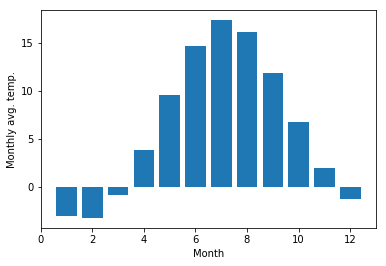

In [73]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [207]:
m = np.random.rand(3,3)
m

array([[0.79729008, 0.36995048, 0.53208232],
       [0.72784289, 0.16789472, 0.36548098],
       [0.64275017, 0.82376707, 0.94225174]])

In [208]:
# global max
m.max()

0.9422517358676263

In [209]:
# max in each column
m.max(axis=0)

array([0.79729008, 0.82376707, 0.94225174])

In [210]:
# max in each row
m.max(axis=1)

array([0.79729008, 0.72784289, 0.94225174])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [211]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [212]:
n, m = A.shape

In [213]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [214]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [215]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [216]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [217]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [218]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [219]:
v = np.array([1,2,3])

In [220]:
np.shape(v)

(3,)

In [221]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [222]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [223]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [224]:
a = np.array([[1, 2], [3, 4]])

In [225]:
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [226]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [227]:
b = np.array([[5, 6]])

In [228]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [229]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [230]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [231]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Exercise: Border

<div class="alert alert-success">
Write a function to create a 2D array of arbitrary shape. This array should have all zero values, except for the elements around the border (i.e., the first and last rows, and the first and last columns), which should have a value of one.
</div>

In [232]:
def border(n, m):
    """Creates an array with shape (n, m) that is all zeros
    except for the border (i.e., the first and last rows and
    columns), which should be filled with ones.

    Hint: you should be able to do this in three lines
    (including the return statement)

    Parameters
    ----------
    n, m: int
        Number of rows and number of columns

    Returns
    -------
    numpy array with shape (n, m)

    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_array_equal
from nose.tools import assert_equal

# check a few small examples explicitly
assert_array_equal(border(1, 1), [[1]])
assert_array_equal(border(2, 2), [[1, 1], [1, 1]])
assert_array_equal(border(3, 3), [[1, 1, 1], [1, 0, 1], [1, 1, 1]])
assert_array_equal(border(3, 4), [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]])

# check a few large and random examples
for i in range(10):
    n, m = np.random.randint(2, 1000, 2)
    result = border(n, m)

    # check dtype and array shape
    assert_equal(result.dtype, np.float)
    assert_equal(result.shape, (n, m))

    # check the borders
    assert (result[0] == 1).all()
    assert (result[-1] == 1).all()
    assert (result[:, 0] == 1).all()
    assert (result[:, -1] == 1).all()

    # check that everything else is zero
    assert np.sum(result) == (2*n + 2*m - 4)

print("Success!")

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [234]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [235]:
# now B is referring to the same array data as A 
B = A 

In [236]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [237]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [238]:
B = np.copy(A)

In [239]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [240]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [241]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [242]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [243]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [244]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [245]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [246]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [260]:
Theta_vec = np.vectorize(Theta)

In [261]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [262]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [263]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [264]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [265]:
M

array([[ 1,  4],
       [ 9, 16]])

In [266]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [267]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [268]:
M.dtype

dtype('int64')

In [269]:
M2 = M.astype(float)

M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [270]:
M2.dtype

dtype('float64')

In [271]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

A particular NumPy feature of interest is solving a system of linear equations. NumPy has a function to solve linear equations. 
For example these linear equations 

\begin{align}
2x + 6y & =  6 \\
5x + 3y & =  -9 
\end{align}

can be solved by:

In [272]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = np.linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

---
## Exercise: Truth tables

This is a final exercise to get you comfortable working with numpy arrays. In this exercise, we're going to be programmatically constructing truth tables from boolean vectors. A *truth table* lists all possible Boolean outputs for the given inputs. For example, an AND truth table would look like this:

<table class="table table-striped" style="width: 5em;">
  <thead>
    <tr>
      <th>$a$</th>
      <th>$b$</th>
      <th>$a\wedge b$
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <th>0</th>
      <th>0</th>
    </tr>
    <tr>
      <th>0</th>
      <th>1</th>
      <th>0</th>
    </tr>
    <tr>
      <th>1</th>
      <th>0</th>
      <th>0</th>
    </tr>
    <tr>
      <th>1</th>
      <th>1</th>
      <th>1</th>
    </tr>
  </tbody>
</table>

Each row corresponds to different values of $a$ (first column) and $b$ (second column), and the third column corresponds to whatever $a\wedge b$ is.

We can represent the different values of $a$ and $b$ using boolean arrays in numpy:

In [273]:
# create boolean vectors a and b
a = np.array([0, 0, 1, 1], dtype=bool)
b = np.array([0, 1, 0, 1], dtype=bool)

You can compute the logical AND of `a` and `b` using the `&` operator (and the symbols for the Boolean operations OR and NOT are `|` and `~`, respectively).

In [274]:
# run this cell to see what happens when we use the & operator on a and b
a & b

array([False, False, False,  True])

<div class="alert alert-success">Complete the functions below to produce truth tables for AND, OR, and NOT. Be sure to use the logical operators discussed above in your solution!</div>

---

### Part A: AND Table


In [275]:
def and_table(a, b):
    """
    Takes two boolean vectors, `a` and `b`, and returns an AND truth
    table consisting three columns: a, b, and (a AND b). If you forget
    how an AND operator works, see the Wikipedia page on logical
    conjunctions: https://en.wikipedia.org/wiki/Logical_conjunction

    Parameters
    ----------
    a : boolean array with shape (n,)
    b : boolean array with shape (n,)

    Returns
    -------
    boolean array with shape (n, 3)

    """
    # YOUR CODE HERE
    raise NotImplementedError()


After you have implemented `and_table` above, you can try running it with inputs `a` and `b`:

In [ ]:
and_table(a, b)

In [ ]:
"""Check whether and_table returns an array with the correct shape for random inputs."""
from nose.tools import assert_equal
for i in range(10):
    # randomize the vector length
    n = np.random.randint(1, 11)
    # randomly generate binary vectors
    v1 = np.random.randint(0, 2, n).astype(bool)
    v2 = np.random.randint(0, 2, n).astype(bool)
    # check the shape of the AND table
    assert_equal(and_table(v1, v2).shape, (n, 3))

print("Success!")

In [ ]:
"""Check whether and_table returns the correct answer for two particular vectors."""
from numpy.testing import assert_array_equal
# create the two vectors
v1 = np.array([0, 0, 1, 1], dtype=bool)
v2 = np.array([0, 1, 0, 1], dtype=bool)

# check (v1 AND v1)
v11 = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1]], dtype=bool)
assert_array_equal(and_table(v1, v1), v11)

# check (v1 AND v2)
v12 = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]], dtype=bool)
assert_array_equal(and_table(v1, v2), v12)

# check (v2 AND v1)
v21 = np.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 1]], dtype=bool)
assert_array_equal(and_table(v2, v1), v21)

# check (v2 AND v2)
v22 = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1]], dtype=bool)
assert_array_equal(and_table(v2, v2), v22)

print("Success!")

### Part B: OR Table

In [ ]:
def or_table(a, b):
    """
    Takes two boolean vectors, `a` and `b`, and returns an OR truth
    table consisting three columns: a, b, and (a OR b).

    Parameters
    ----------
    a : boolean array with shape (n,)
    b : boolean array with shape (n,)

    Returns
    -------
    boolean array with shape (n, 3)

    """
    # YOUR CODE HERE
    raise NotImplementedError()

After you have implemented `or_table` above, you can try running it with inputs `a` and `b`:

In [ ]:
or_table(a, b)

In [ ]:
"""Check whether or_table returns an array with the correct shape for random inputs."""
for i in range(10):
    # randomize the vector length
    n = np.random.randint(1, 11)
    # randomly generate binary vectors
    v1 = np.random.randint(0, 2, n).astype(bool)
    v2 = np.random.randint(0, 2, n).astype(bool)
    # check the shape of the OR table
    assert_equal(or_table(v1, v2).shape, (n, 3))

print("Success!")

In [ ]:
"""Check whether or_table returns the correct answer for two particular vectors."""
# create the two vectors
v1 = np.array([0, 0, 1, 1], dtype=bool)
v2 = np.array([0, 1, 0, 1], dtype=bool)

# check (v1 OR v1)
v11 = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1]], dtype=bool)
assert_array_equal(or_table(v1, v1), v11)

# check (v1 OR v2)
v12 = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=bool)
assert_array_equal(or_table(v1, v2), v12)

# check (v2 OR v1)
v21 = np.array([[0, 0, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]], dtype=bool)
assert_array_equal(or_table(v2, v1), v21)

# check (v2 OR v2)
v22 = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0], [1, 1, 1]], dtype=bool)
assert_array_equal(or_table(v2, v2), v22)

print("Success!")

---
### Part C: NOT Table

In [ ]:
def not_table(a):
    """
    Takes one boolean vector, `a`, and returns a NOT truth
    table consisting two columns: a and (NOT a).

    Parameters
    ----------
    a : boolean array with shape (n,)

    Returns
    -------
    boolean array with shape (n, 2)

    """
    # YOUR CODE HERE
    raise NotImplementedError()

After you have implemented `not_table` above, you can try running it with inputs `a` and `b`:

In [ ]:
not_table(a)

In [ ]:
"""Check whether or_table returns an array with the correct shape for random inputs."""
for i in range(10):
    # randomize the vector length
    n = np.random.randint(1, 11)
    # randomly generate a binary vector
    v = np.random.randint(0, 2, n).astype(bool)
    # check the shape of the OR table
    assert_equal(not_table(v).shape, (n, 2))

print("Success!")

In [ ]:
"""Check whether or_table returns the correct answer for two particular vectors."""
# create the two vectors
v1 = np.array([0, 0, 1, 1], dtype=bool)
v2 = np.array([0, 1, 0, 1], dtype=bool)

# check (NOT v1)
vn1 = np.array([[0, 1], [0, 1], [1, 0], [1, 0]], dtype=bool)
assert_array_equal(not_table(v1), vn1)

# check (NOT v2)
vn2 = np.array([[0, 1], [1, 0], [0, 1], [1, 0]], dtype=bool)
assert_array_equal(not_table(v2), vn2)

print("Success!")